In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_diabetes = pd.read_csv('data/pima-indians-diabetes.csv', sep=',')
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Exploracion de datos

In [4]:
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
328,6,105,70,32,68,30.8,0.122,37,0
236,0,179,90,27,0,44.1,0.686,23,1
354,9,165,88,0,0,30.4,0.302,49,1
243,2,146,76,35,194,38.2,0.329,29,0
57,0,146,82,0,0,40.5,1.781,44,0
371,0,84,64,22,66,35.8,0.545,21,0
597,1,173,74,0,0,36.8,0.088,38,1
58,0,105,64,41,142,41.5,0.173,22,0
691,2,121,70,32,95,39.1,0.886,23,0
186,1,128,98,41,58,32.0,1.321,33,1


In [5]:
# Renombrar columnas
df_diabetes.columns =  ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [6]:
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
# Analizar el shape del objeto
print(f"Shape of the DataFrame: {df_diabetes.shape}")

Shape of the DataFrame: (767, 9)


In [8]:
# Visualizar los tipos de datos
print(f"Data types in the DataFrame:\n{df_diabetes.dtypes}")

Data types in the DataFrame:
1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object


### Entrenamiento de random forest con scikit-learn

In [9]:
X = df_diabetes.drop("9. Class variable (0 or 1)", axis=1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [12]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [13]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Evaluacion del modelo

In [14]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9850746268656716
Test accuracy: 0.7445887445887446


In [15]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


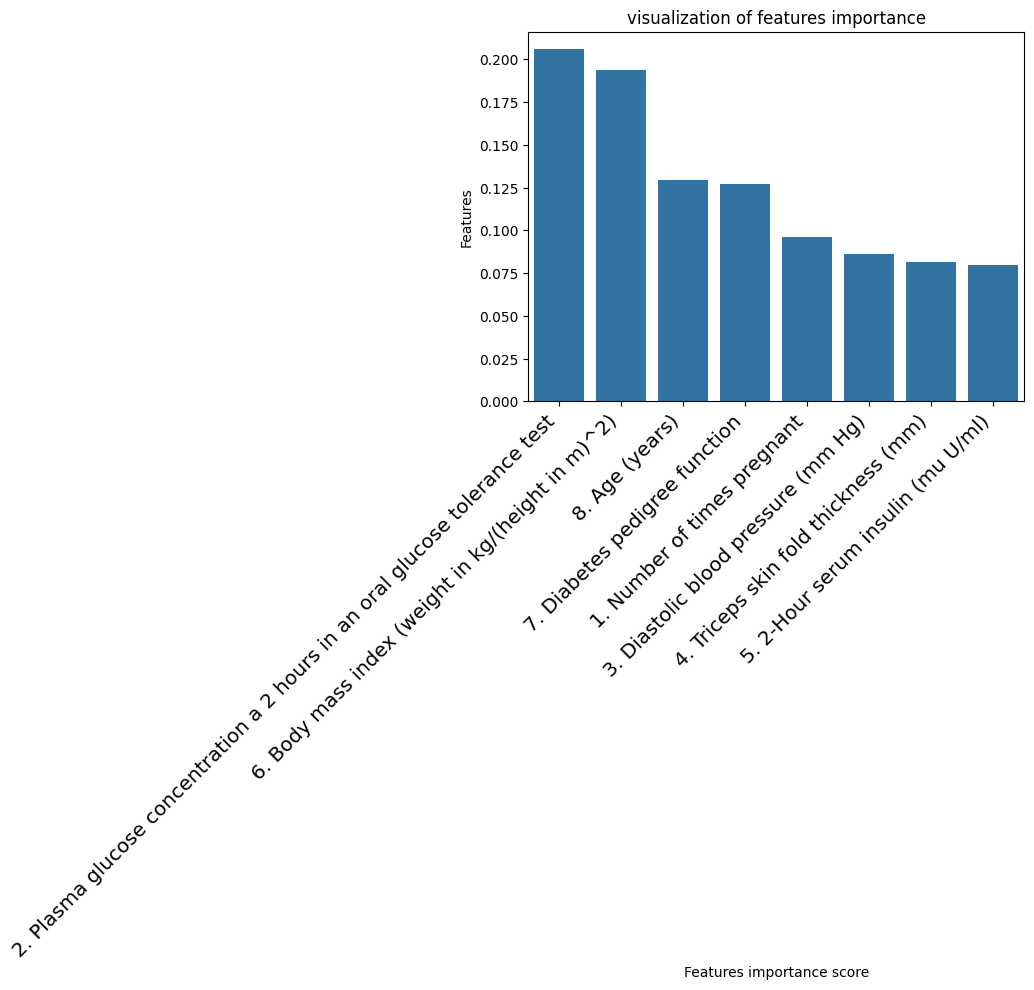

In [16]:
import seaborn as sns

sns.barplot(x= feature_importances_df.feature, y= feature_importances_df.importance)
plt.xlabel("Features importance score")
plt.ylabel("Features")
plt.title("visualization of features importance")
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()